In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from perceptron import Perceptron

In [4]:
df = pd.read_csv('input/Surgical-deepnet.csv')
df.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [5]:
df.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [6]:
# 1. Fit an object oriented perceptron algorithm on the surgical dataset for classification

X = df.drop('complication', axis=1).copy().values
Y = df[['complication']].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((11708, 24), (2927, 24), (11708, 1), (2927, 1))

In [7]:
model = Perceptron(learning_rate=0.001, input_length=X_train.shape[1], type_of_data='classification')
model.fit(X_train,  X_test, Y_train, Y_test, epochs=128)

100%|██████████| 128/128 [00:44<00:00,  2.90it/s]


In [8]:
model.evaluate(X_test, Y_test)

(8.635949338406688, 18.320464639562694)

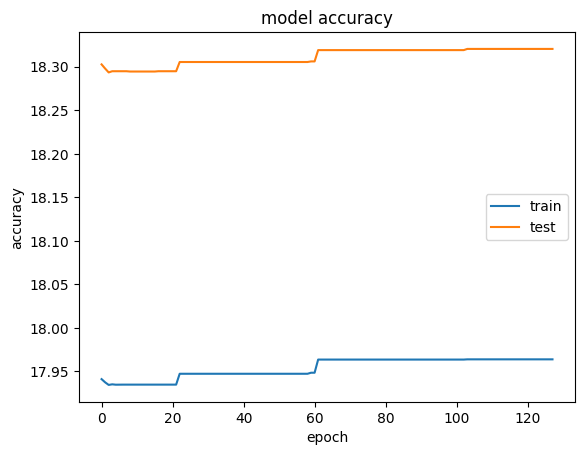

In [9]:
# 2. Plot accuracy in each epoch for train and test data

plt.plot(model.train_accuracies)
plt.plot(model.test_accuracies)
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

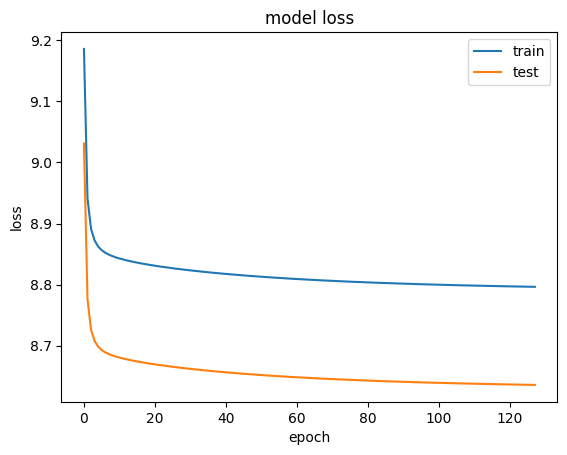

In [10]:
# 3. Plot loss in each epoch for train and test data

plt.plot(model.train_losses)
plt.plot(model.test_losses)
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

In [11]:
# 4. Calculate confusion matrix

Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
Y_pred = np.max(Y_pred, axis=1)
Y_pred = Y_pred.reshape(-1, 1)
Y_pred.shape

(2927, 1)

In [12]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

confusion_matrix

array([[2018,  208],
       [ 395,  306]], dtype=int64)

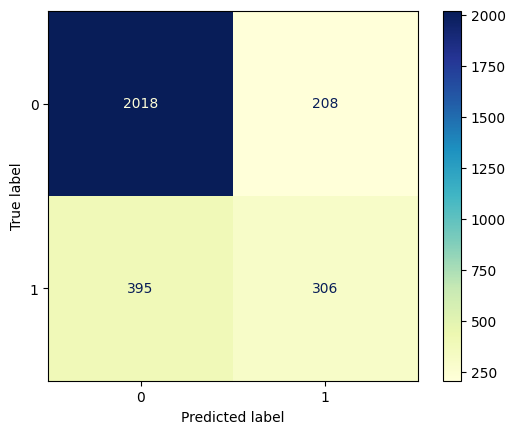

In [13]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot(cmap='YlGnBu')
plt.show()

In [14]:
# 5. Repeat the above steps with 5 different activation functions

functions = ['sigmoid', 'relu', 'tanh', 'linear', 'softmax']
losses = {'sigmoid':0, 'relu':0, 'tanh':0, 'linear':0, 'softmax':0}
accuracies = {'sigmoid':0, 'relu':0, 'tanh':0, 'linear':0, 'softmax':0}

for function in functions:
    model = Perceptron(learning_rate=0.001, input_length=X_train.shape[1], type_of_data='classification', function=function)
    model.fit(X_train,  X_test, Y_train, Y_test, epochs=256)  

    loss, accuracy = model.evaluate(X_test, Y_test)
    losses[function] = loss
    accuracies[function] = accuracy

losses
accuracies

  0%|          | 0/256 [00:00<?, ?it/s]d:\Python\Leyla\PyMachinLearning\PyML47_Perceptron\perceptron.py:35: RuntimeWarning: overflow encountered in multiply
  loss_weights = (y_pred - y_train) * x_train
d:\Python\Leyla\PyMachinLearning\PyML47_Perceptron\perceptron.py:37: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.learning_rate * loss_weights
 13%|█▎        | 34/256 [00:13<01:23,  2.66it/s]d:\Python\Leyla\PyMachinLearning\PyML47_Perceptron\perceptron.py:27: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / np.sum(np.exp(x))
d:\Python\Leyla\PyMachinLearning\PyML47_Perceptron\perceptron.py:27: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x))
100%|██████████| 256/256 [01:40<00:00,  2.55it/s]


{'sigmoid': 18.320464639562694,
 'relu': 18.286983259309874,
 'tanh': 17.783054321831226,
 'linear': 18.28288349846259,
 'softmax': 18.252135292107962}